In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
asthma = pd.read_csv('merged.csv')
asthma.head(10)

,Unnamed: 0,year,fips,state_name,county_name,arithmetic_mean|Carbon monoxide,arithmetic_mean|Nitrogen dioxide (NO2),arithmetic_mean|Ozone,arithmetic_mean|PM2.5 - Local Conditions,arithmetic_standard_dev|Carbon monoxide,...,sex,asthma_deaths_per_100k,asthma_lb,asthma_ub,current_smoking_pct,current_smoking_lb,current_smoking_ub,daily_smoker_pct,daily_smoker_lb,daily_smoker_ub
0,0,1996,10001,Delaware,Kent,0.000000,0.000000,0.052134,0.0,0.000000,...,Both,2.016585,1.682840,2.418712,27.85,25.41,30.42,24.97,22.72,27.48
1,1,1996,10003,Delaware,New Castle,0.777178,19.040930,0.045973,0.0,0.349306,...,Both,1.738850,1.518789,2.009553,25.38,23.46,27.31,21.43,19.76,23.18
2,2,1996,10005,Delaware,Sussex,0.000000,0.000000,0.048738,0.0,0.000000,...,Both,1.693894,1.426025,1.998171,28.77,26.22,31.37,25.79,23.31,28.02
3,3,1996,12003,Florida,Baker,0.000000,0.000000,0.040651,0.0,0.000000,...,Both,1.995325,1.561440,2.510761,29.25,24.59,34.13,26.08,21.83,30.95
4,4,1996,12009,Florida,Brevard,0.000000,0.000000,0.038388,0.0,0.000000,...,Both,1.334301,1.149089,1.550314,28.50,24.56,32.46,24.41,21.30,28.26
5,5,1996,12011,Florida,Broward,0.735181,8.580437,0.035056,0.0,0.409056,...,Both,1.611282,1.459068,1.795843,24.35,21.94,27.04,19.38,17.07,21.88
6,6,1996,12031,Florida,Duval,0.665576,14.918262,0.039973,0.0,0.406632,...,Both,2.610711,2.342217,2.923261,25.00,22.12,28.07,21.55,18.91,24.67
7,7,1996,12033,Florida,Escambia,0.000000,0.000000,0.043519,0.0,0.000000,...,Both,2.162940,1.814438,2.560791,26.65,23.06,30.58,22.49,19.33,26.00
8,8,1996,12057,Florida,Hillsborough,0.962998,8.173658,0.042099,0.0,0.383495,...,Both,1.940450,1.724976,2.194718,24.99,22.22,28.15,21.21,18.58,24.03
9,9,1996,12059,Florida,Holmes,0.000000,0.000000,0.036669,0.0,0.000000,...,Both,1.844812,1.340278,2.470405,29.83,24.96,34.96,25.86,21.28,31.16


In [5]:
asthma['observed'] = 1
asthma = asthma.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
asthma.columns

Index(['year', 'fips', 'state_name', 'county_name',
       'arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',
       'arithmetic_standard_dev|Carbon monoxide',
       'arithmetic_standard_dev|Nitrogen dioxide (NO2)',
       'arithmetic_standard_dev|Ozone',
       'arithmetic_standard_dev|PM2.5 - Local Conditions',
       'fifty_percentile|Carbon monoxide',
       'fifty_percentile|Nitrogen dioxide (NO2)', 'fifty_percentile|Ozone',
       'fifty_percentile|PM2.5 - Local Conditions',
       'first_max_value|Carbon monoxide',
       'first_max_value|Nitrogen dioxide (NO2)', 'first_max_value|Ozone',
       'first_max_value|PM2.5 - Local Conditions',
       'fourth_max_value|Carbon monoxide',
       'fourth_max_value|Nitrogen dioxide (NO2)', 'fourth_max_value|Ozone',
       'fourth_max_value|PM2.5 - Local Conditions',
       'latitude|Nitrogen dioxide (NO2)', 'longitude|PM2.5 - Local

In [6]:
asthma.head(10)


,year,fips,state_name,county_name,arithmetic_mean|Carbon monoxide,arithmetic_mean|Nitrogen dioxide (NO2),arithmetic_mean|Ozone,arithmetic_mean|PM2.5 - Local Conditions,arithmetic_standard_dev|Carbon monoxide,arithmetic_standard_dev|Nitrogen dioxide (NO2),...,asthma_deaths_per_100k,asthma_lb,asthma_ub,current_smoking_pct,current_smoking_lb,current_smoking_ub,daily_smoker_pct,daily_smoker_lb,daily_smoker_ub,observed
0,1996,10001,Delaware,Kent,0.000000,0.000000,0.052134,0.0,0.000000,0.000000,...,2.016585,1.682840,2.418712,27.85,25.41,30.42,24.97,22.72,27.48,1
1,1996,10003,Delaware,New Castle,0.777178,19.040930,0.045973,0.0,0.349306,12.161065,...,1.738850,1.518789,2.009553,25.38,23.46,27.31,21.43,19.76,23.18,1
2,1996,10005,Delaware,Sussex,0.000000,0.000000,0.048738,0.0,0.000000,0.000000,...,1.693894,1.426025,1.998171,28.77,26.22,31.37,25.79,23.31,28.02,1
3,1996,12003,Florida,Baker,0.000000,0.000000,0.040651,0.0,0.000000,0.000000,...,1.995325,1.561440,2.510761,29.25,24.59,34.13,26.08,21.83,30.95,1
4,1996,12009,Florida,Brevard,0.000000,0.000000,0.038388,0.0,0.000000,0.000000,...,1.334301,1.149089,1.550314,28.50,24.56,32.46,24.41,21.30,28.26,1
5,1996,12011,Florida,Broward,0.735181,8.580437,0.035056,0.0,0.409056,9.036147,...,1.611282,1.459068,1.795843,24.35,21.94,27.04,19.38,17.07,21.88,1
6,1996,12031,Florida,Duval,0.665576,14.918262,0.039973,0.0,0.406632,9.594936,...,2.610711,2.342217,2.923261,25.00,22.12,28.07,21.55,18.91,24.67,1
7,1996,12033,Florida,Escambia,0.000000,0.000000,0.043519,0.0,0.000000,0.000000,...,2.162940,1.814438,2.560791,26.65,23.06,30.58,22.49,19.33,26.00,1
8,1996,12057,Florida,Hillsborough,0.962998,8.173658,0.042099,0.0,0.383495,7.366868,...,1.940450,1.724976,2.194718,24.99,22.22,28.15,21.21,18.58,24.03,1
9,1996,12059,Florida,Holmes,0.000000,0.000000,0.036669,0.0,0.000000,0.000000,...,1.844812,1.340278,2.470405,29.83,24.96,34.96,25.86,21.28,31.16,1


In [9]:
noAsthma = pd.read_csv('no_asthma.csv')
noAsthma = noAsthma.drop(columns=['Unnamed: 0'])
noAsthma.head()

,year,fips,state_name,county_name,arithmetic_mean|Carbon monoxide,arithmetic_mean|Nitrogen dioxide (NO2),arithmetic_mean|Ozone,arithmetic_mean|PM2.5 - Local Conditions,arithmetic_standard_dev|Carbon monoxide,arithmetic_standard_dev|Nitrogen dioxide (NO2),...,seventy_five_percentile|Ozone,seventy_five_percentile|PM2.5 - Local Conditions,ten_percentile|Carbon monoxide,ten_percentile|Nitrogen dioxide (NO2),ten_percentile|Ozone,ten_percentile|PM2.5 - Local Conditions,third_max_value|Carbon monoxide,third_max_value|Nitrogen dioxide (NO2),third_max_value|Ozone,third_max_value|PM2.5 - Local Conditions
0,1980,1001,Alabama,Autauga,0.000000,0.000000,0.054327,0.0,0.000000,0.000000,...,0.066,0.0,0.0,0.0,0.035,0.0,0.0,0.00,0.093,0.0
1,1980,1083,Alabama,Limestone,0.000000,6.369048,0.000000,0.0,0.000000,3.060250,...,0.000,0.0,0.0,3.5,0.000,0.0,0.0,12.50,0.000,0.0
2,1980,1099,Alabama,Monroe,0.000000,0.000000,0.049797,0.0,0.000000,0.000000,...,0.061,0.0,0.0,0.0,0.028,0.0,0.0,0.00,0.105,0.0
3,1980,2185,Alaska,North Slope,0.190856,2.759253,0.000000,0.0,0.102149,5.192010,...,0.000,0.0,0.1,0.0,0.000,0.0,0.6,34.25,0.000,0.0
4,1980,2261,Alaska,Valdez-Cordova,0.000000,4.461930,0.023752,0.0,0.000000,4.481464,...,0.045,0.0,0.0,0.5,0.025,0.0,0.0,30.50,0.053,0.0


In [10]:
noAsthma['observed'] = 0
noAsthma.columns

Index(['year', 'fips', 'state_name', 'county_name',
       'arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',
       'arithmetic_standard_dev|Carbon monoxide',
       'arithmetic_standard_dev|Nitrogen dioxide (NO2)',
       'arithmetic_standard_dev|Ozone',
       'arithmetic_standard_dev|PM2.5 - Local Conditions',
       'fifty_percentile|Carbon monoxide',
       'fifty_percentile|Nitrogen dioxide (NO2)', 'fifty_percentile|Ozone',
       'fifty_percentile|PM2.5 - Local Conditions',
       'first_max_value|Carbon monoxide',
       'first_max_value|Nitrogen dioxide (NO2)', 'first_max_value|Ozone',
       'first_max_value|PM2.5 - Local Conditions',
       'fourth_max_value|Carbon monoxide',
       'fourth_max_value|Nitrogen dioxide (NO2)', 'fourth_max_value|Ozone',
       'fourth_max_value|PM2.5 - Local Conditions',
       'latitude|Nitrogen dioxide (NO2)', 'longitude|PM2.5 - Local

In [11]:
noAsthma.head()

,year,fips,state_name,county_name,arithmetic_mean|Carbon monoxide,arithmetic_mean|Nitrogen dioxide (NO2),arithmetic_mean|Ozone,arithmetic_mean|PM2.5 - Local Conditions,arithmetic_standard_dev|Carbon monoxide,arithmetic_standard_dev|Nitrogen dioxide (NO2),...,seventy_five_percentile|PM2.5 - Local Conditions,ten_percentile|Carbon monoxide,ten_percentile|Nitrogen dioxide (NO2),ten_percentile|Ozone,ten_percentile|PM2.5 - Local Conditions,third_max_value|Carbon monoxide,third_max_value|Nitrogen dioxide (NO2),third_max_value|Ozone,third_max_value|PM2.5 - Local Conditions,observed
0,1980,1001,Alabama,Autauga,0.000000,0.000000,0.054327,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.035,0.0,0.0,0.00,0.093,0.0,0
1,1980,1083,Alabama,Limestone,0.000000,6.369048,0.000000,0.0,0.000000,3.060250,...,0.0,0.0,3.5,0.000,0.0,0.0,12.50,0.000,0.0,0
2,1980,1099,Alabama,Monroe,0.000000,0.000000,0.049797,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.028,0.0,0.0,0.00,0.105,0.0,0
3,1980,2185,Alaska,North Slope,0.190856,2.759253,0.000000,0.0,0.102149,5.192010,...,0.0,0.1,0.0,0.000,0.0,0.6,34.25,0.000,0.0,0
4,1980,2261,Alaska,Valdez-Cordova,0.000000,4.461930,0.023752,0.0,0.000000,4.481464,...,0.0,0.0,0.5,0.025,0.0,0.0,30.50,0.053,0.0,0


In [27]:
X = asthma[['arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',]]
y = asthma[['asthma_deaths_per_100k']].values.reshape(-1, 1)
print(X.shape, y.shape)

(12822, 4) (12822, 1)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train) 
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.08354770496659858
Testing Score: 0.0868610706333659


Text(0.5, 1.0, 'Residual Plot')

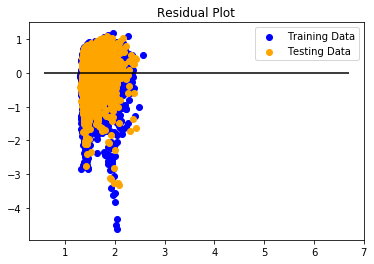

In [30]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTIONb

In [31]:
predicted_deaths = pd.DataFrame(model.predict(X_test))
print(predicted_deaths)

             0
0     1.491344
1     1.528403
2     1.646053
3     1.904129
4     1.399147
5     1.726635
6     1.409531
7     1.620601
8     1.927238
9     1.637789
10    1.483552
11    1.439661
12    1.438746
13    1.661201
14    1.390151
15    1.399807
16    1.443425
17    1.845112
18    1.616579
19    1.900732
20    1.410511
21    1.362946
22    1.470643
23    1.450430
24    1.480640
25    1.442077
26    1.376116
27    1.503869
28    1.645942
29    1.410535
...        ...
3176  1.439133
3177  1.539128
3178  1.532200
3179  1.403937
3180  1.459089
3181  1.432945
3182  1.699461
3183  1.481140
3184  1.424972
3185  1.803142
3186  1.657669
3187  1.950185
3188  1.732568
3189  1.411496
3190  1.874242
3191  1.455977
3192  1.421867
3193  1.442155
3194  1.461055
3195  1.437390
3196  1.467406
3197  1.955241
3198  1.440597
3199  1.462789
3200  1.452761
3201  1.477011
3202  1.432931
3203  1.972579
3204  1.470993
3205  1.618814

[3206 rows x 1 columns]


In [32]:
X_predict = noAsthma[['arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',]]
noAsthma[['asthma_deaths_per_100k']] = pd.DataFrame(model.predict(X_predict))

In [33]:
noAsthma['asthma_deaths_per_100k']

0       1.406551
1       1.744440
2       1.429908
3       1.782451
4       1.604672
5       1.422169
6       1.776160
7       1.804180
8       1.767842
9       1.722755
10      1.761804
11      2.297729
12      2.218494
13      2.071407
14      2.122967
15      1.945781
16      2.425059
17      1.712295
18      1.784903
19      1.762430
20      1.808883
21      1.424206
22      1.408397
23      1.788632
24      1.425139
25      1.873519
26      1.914253
27      1.764316
28      1.766799
29      1.499324
          ...   
3598    1.506819
3599    1.636575
3600    1.433904
3601    1.646062
3602    1.479275
3603    1.449613
3604    1.784165
3605    1.462779
3606    1.478139
3607    1.726497
3608    1.422880
3609    1.498478
3610    1.671286
3611    1.726858
3612    1.501141
3613    1.448017
3614    1.652518
3615    1.469782
3616    1.858514
3617    1.584244
3618    1.644344
3619    1.653521
3620    1.653949
3621    1.848677
3622    1.654579
3623    1.779191
3624    1.891780
3625    1.6602

In [34]:
asthma.to_csv('observed_asthma.csv')
noAsthma.to_csv('predicted_asthma_multi_linear.csv')